# 객체 인식 - 하르 캐스케이드


- 하르 캐스케이드는 에이다부스트 알고리즘을 사용하여 작동하는 새로운 탐지 방법론을 선보였다.
- 이는 매우 복잡하고 다양한 이미지 데이터에서도 얼굴과 같은 객체를 빠르게 탐지할 수 있게 했다.
- 특징 추출
 - 하르 캐스케이드 분류기의 원리를 이해하기 위해서는 먼저 이미지에서 특징을 추출하는 방법을 알아야 한다.
 - 이미지는 픽셀의 그리드로 구성돼 있어며, 각 픽셀은 색상 및 강도 정보를 포함한다.
 - 이 분류기는 이러한 픽셀 정보를 사용하여 이미지의 특정 영역에서 특징을 추출한다.
 - 하르 캐스케이드의 특징은 일반적으로 흰색과 검은색의 직사각형 영역으로 구성된다.
 - 일부 커널은 수평 또는 수직 방향의 픽셀 강도 변화를 포착하며, 다른 커널은 대각선 방향의 픽셀 강도 변화를 포착할 수 있다.


- 특징의 스케일과 위치
 - 이미지 내의 객체 탐지는 그 객체의 사이즈, 모양, 우치에 따라 달라진다.
 - 예를 들어 카메라 앞에서 사람의 얼굴을 탐지하는 경우, 그 사람이 카메라에 가까이 있을 수도 있고, 멀리 있을 수도 있다.
 - 따라서 탐지 알고리즘은 다양한 사이즈와 위치에서의 객체를 모두 고려해야 한다.
 - 하르케스케이드의 특징은 이러한 문제를 해결하기 위해 이미지의 다양한 위치와 사이즈로 스캔된다.
   - 이미지 스케일링: 원본 이미지를 다양한 사이즈로 재조정하여 여러 스케일의 이미지 세트를 생성한다. 각 스케일마다 하르 캐스케이드 특징을 추출하면, 다양한 사이즈의 객체를 탐지하는 데 도움이 된다.
   - 특징의 스케일링: 하르 캐스케이드 특징 자체의 사이즈를 조절하여 다양한 사이즈의 특징을 검출한다. 이 방법은 특정 사이즈의 특징 패턴을 탐지하는데 유용하다.
 - 위치를 검출하기 위해 사용하는 대표적인 방법으로 슬라이딩 윈도우와 스트라이드가 있다.
   - 슬라이딩 윈도우: 이미지 전체를 횡단하면서 지정된 사이즈의 윈도우를 슬라이드 시키는 기법이다. 각 윈도우 위치에서 하르 캐스케이드 특징을 추출하여 해당 위치에서의 객체를 탐지한다.
   - 스트라이드: 슬라이딩 윈도우를 얼마나 빠르게 이동시킬 것인지 결정하는 값이다. 작은 스트라이드 값은 더 높은 해상도의 탐지를 가능하게 하지만 계산 비용이 증가한다.


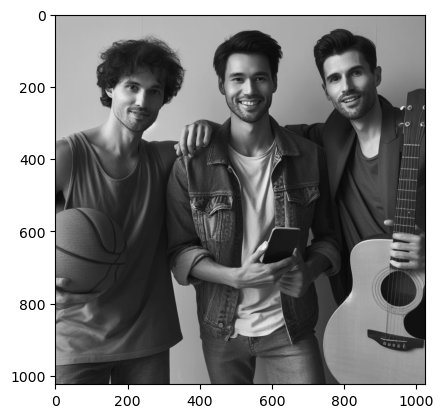

In [175]:
# 하르 카스 케이드 구현 

import cv2
import matplotlib.pyplot as plt

# 이미지 로드 

img_path = "three young man.jpg"
image = cv2.imread(img_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray,cmap='gray')
plt.show()

In [179]:
# 하르 카스케이드 로드
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# CascadeClassifier()는 분류기를 로드하는 클래스다.
# OpenCV에는 사전 훈련된 여러 하르 케스케이드 XML 파일이 포함돼 있다.
# _frontalface_default.xml: 정면 얼굴 탐지
# _froifleface.xml: 프로필 얼굴(측면얼굴) 탐지
# _eye.xml: 눈 탐지
# _eye_three_eyeglasses.xml: 안경을 착용한 눈 탐지
# _smile.xml: 웃는 얼굴 탐지
# _upperbody.xml: 상체 탐지
# _lowerbody.xml: 하체 탐지
# _fullbody.xml: 전체 몸체 탐지
# _mcs_nose.xml: 코 탐지
# _mcs_mouth.xml: 입 탐지
# _mcs_ear.xml: 귀 탐지

# 얼굴 인식
faces = face_cascade.detectMultiScale(
    gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)
)

print(faces)  # (x, y, width, height)

[[449 111 173 173]
 [721 106 170 170]
 [159 148 160 160]
 [371 376 116 116]]


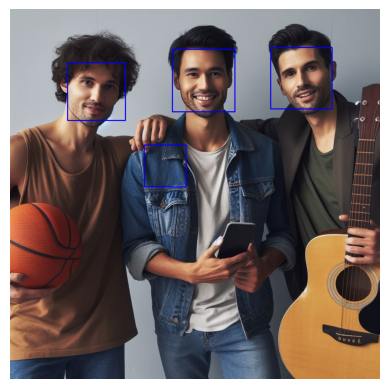

In [180]:
# 모델에서 받은 좌표 값으로 이미지위에 사각형을 그린다 
# rectangle(): 255, 0, 0 인 파란색으로 영역을 표시 , 선굵은 2 
for(x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()